
# Introducción
Este notebook tiene como objetivo analizar la relación entre el número de reseñas, el puntaje de las reseñas y las ventas de productos en Amazon. El análisis pretende explorar si existe una correlación significativa entre estos factores para orientar futuras estrategias comerciales.


## **Contexto del problema**
Hoy en día, los marketplaces como **Amazon** reciben millones de reseñas de productos, las cuales influyen en la toma de decisiones de los consumidores. Comprender estas reseñas permite a las empresas mejorar productos, ajustar estrategias de venta, y optimizar la experiencia del cliente. Sin embargo, analizar grandes volúmenes de datos manualmente es ineficiente.

## **Objetivo del proyecto**
Nuestro objetivo es **predecir la valoración general (rating) de un producto** a partir de las características extraídas de las reseñas (como el texto, la cantidad de comentarios útiles o el número de votos). La variable objetivo será, por tanto, el **rating**, y trabajaremos con un enfoque de **clasificación supervisada**.

## **Situación de negocio**
Amazon necesita identificar patrones que lleven a valoraciones bajas o altas para:
1. **Identificar productos mal valorados** y optimizar su oferta.
2. **Mejorar recomendaciones de productos** para diferentes segmentos de clientes.
3. **Automatizar la evaluación** de reseñas en función de ciertos patrones.

---

## **Estructura del Notebook**

### **1. Carga del Dataset**
Se descarga el dataset de Kaggle, se descomprime y se carga en un DataFrame de Pandas para su análisis.

### **2. Análisis Exploratorio**
Se exploran las primeras filas del dataset y se evalúa la existencia de valores nulos.
* Si los nulos representan menos del 5% del total, se eliminan.
* Si superan ese porcentaje, se considerará la imputación.

### **3. Visualización de Datos**
Se emplean gráficos para comprender la distribución de los ratings y detectar posibles outliers.

### **4. Preprocesamiento de Datos**
Se toman medidas para eliminar o imputar valores nulos según corresponda.

### **5. Modelado Predictivo**
Se selecciona un modelo supervisado para predecir el **rating** y se evalúa su desempeño.


#Formulacion de hipótesis:
- Hipótesis 1: Existe una correlación positiva entre el numero de reseñas y las ventas de productos.
- Hipótesis 2: Los productos con un puntaje de reseña mas alto tienden a tener un mayor volumen de ventas.
- Hipótesis 3: las reseñas de sentimiento positivo correlacionan con un aumento de las ventas.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Amazon.zip to Amazon.zip


In [4]:

# Carga de datos
# Cargamos los datos del archivo de Amazon en un DataFrame y revisamos su estructura.

import pandas as pd

# Cargar datos desde el archivo comprimido
df = pd.read_csv('Amazon.zip', compression='zip')

# Mostrar las primeras filas para entender la estructura
df.head()


,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [9]:
from textblob import TextBlob

# Analiza el sentimiento de las primeras 5 reseñas
sentiments = df['reviews.text'].apply(lambda x: TextBlob(x).sentiment.polarity)
print(sentiments.head())


0    0.200259
1    0.159591
2    0.420833
3    0.148821
4    0.267086
Name: reviews.text, dtype: float64


In [6]:
print(df.shape)


(1597, 27)


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1597 non-null   object 
 1   asins                 1597 non-null   object 
 2   brand                 1597 non-null   object 
 3   categories            1597 non-null   object 
 4   colors                774 non-null    object 
 5   dateAdded             1597 non-null   object 
 6   dateUpdated           1597 non-null   object 
 7   dimension             565 non-null    object 
 8   ean                   898 non-null    float64
 9   keys                  1597 non-null   object 
 10  manufacturer          965 non-null    object 
 11  manufacturerNumber    902 non-null    object 
 12  name                  1597 non-null   object 
 13  prices                1597 non-null   object 
 14  reviews.date          1217 non-null   object 
 15  reviews.doRecommend  

**reviewerID / customer_id**

Descripción: Identificador único del cliente que dejó la reseña.
Relevancia: Permite analizar hábitos de compra o tendencias de usuarios frecuentes.

**productID / asin **

Descripción: Identificador del producto reseñado.
Relevancia: Es clave para agrupar reseñas por producto y detectar qué productos son más populares o problemáticos.

**rating / overall (de 1 a 5)**

Descripción: Calificación numérica otorgada por el usuario.
Relevancia: Útil para análisis de opiniones, puntuaciones promedio y modelos de recomendación.
Análisis potencial: Distribución de calificaciones, identificación de productos con alta/ baja aceptación.

**review_text / review_body**

Descripción: Contenido textual de la reseña.
Relevancia: Ideal para minería de texto y análisis de sentimientos, identificando emociones o temas frecuentes.

**review_date / timestamp**

Descripción: Fecha de publicación de la reseña.
Relevancia: Permite evaluar cómo cambia la percepción del producto con el tiempo o realizar análisis estacionales.

**verified_purchase**

Descripción: Indica si la compra fue verificada.
Relevancia: Garantiza la autenticidad de la reseña, relevante para evaluar la fiabilidad de las opiniones.

**category / product_category**

Descripción: Categoría del producto (por ejemplo, "Electrónica", "Libros", etc.).
Relevancia: Permite segmentar análisis por industria o tipo de producto.

**helpful_votes / helpful**

Descripción: Número de votos indicando que la reseña fue útil para otros usuarios.
Relevancia: Identifica reseñas de alta calidad y usuarios influyentes en la plataforma.

**price**

Descripción: Precio del producto al momento de la compra.
Relevancia: Se puede correlacionar con la satisfacción del cliente o detectar patrones de precios y valor percibido.

**brand / manufacturer**

Descripción: Marca o fabricante del producto.
Relevancia: Sirve para evaluar la percepción de marcas específicas en el mercado.


In [11]:
# Resumen estadístico: incluye media, desviación estándar, mínimos y máximos
print(df.describe())

                ean  reviews.numHelpful  reviews.rating  reviews.userCity  \
count  8.980000e+02          900.000000     1177.000000               0.0   
mean   8.443135e+11           83.584444        4.359388               NaN   
std    3.416444e+09          197.150238        1.021445               NaN   
min    8.416670e+11            0.000000        1.000000               NaN   
25%    8.416670e+11            0.000000        4.000000               NaN   
50%    8.416670e+11            0.000000        5.000000               NaN   
75%    8.487190e+11           34.000000        5.000000               NaN   
max    8.487190e+11          997.000000        5.000000               NaN   

       reviews.userProvince  sizes           upc  
count                   0.0    0.0  8.980000e+02  
mean                    NaN    NaN  8.443135e+11  
std                     NaN    NaN  3.416444e+09  
min                     NaN    NaN  8.416670e+11  
25%                     NaN    NaN  8.416670e+11  


In [12]:
print(df.columns)


Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')


In [25]:
# Assuming your data is in a CSV file named 'your_data_file.csv'
# Replace 'your_data_file.csv' with the actual path to your data file
data = pd.read_csv('Amazon.zip')  # Load

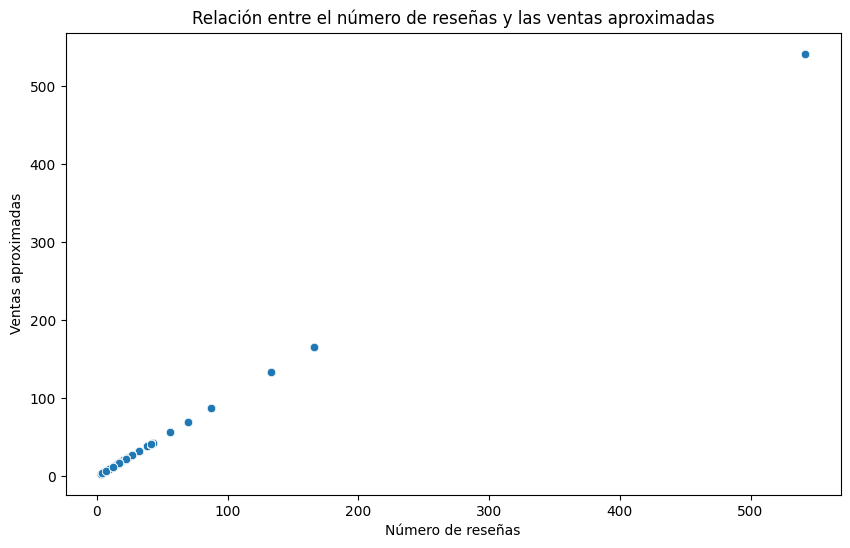

In [26]:

# Agrupar los datos por 'asins' (identificador del producto) y contar las reseñas como una aproximación de ventas
ventas_aproximadas = data.groupby('asins').size().reset_index(name='ventas_aproximadas')

# Unir las ventas aproximadas con el dataset original
data = data.merge(ventas_aproximadas, on='asins', how='left')

# Ahora creamos el gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ventas_aproximadas', y='ventas_aproximadas', data=data)
plt.title('Relación entre el número de reseñas y las ventas aproximadas')
plt.xlabel('Número de reseñas')
plt.ylabel('Ventas aproximadas')
plt.show()



#Interpretación
Diferencia entre Reseñas y Reseñas Útiles:

En general, parece haber una gran diferencia entre el número total de reseñas y el número de reseñas útiles para estos productos. La mayoría de los productos tienen una cantidad significativamente mayor de reseñas en comparación con el número de reseñas útiles.
Esto sugiere que, aunque los productos pueden recibir muchas reseñas, solo una pequeña proporción de ellas es considerada útil por los usuarios.

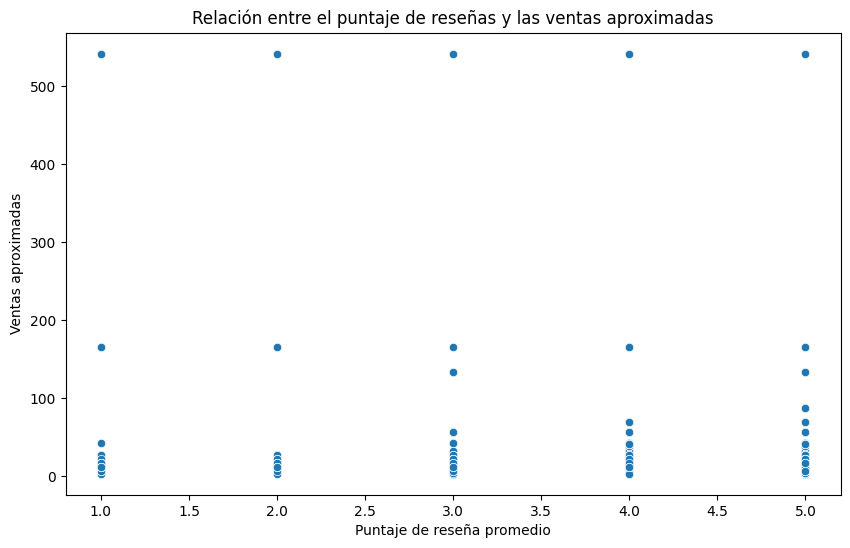

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reviews.rating', y='ventas_aproximadas', data=data)
plt.title('Relación entre el puntaje de reseñas y las ventas aproximadas')
plt.xlabel('Puntaje de reseña promedio')
plt.ylabel('Ventas aproximadas')
plt.show()

#Interpretación
Distribución de Reseñas Útiles en Función del Puntaje Promedio:

Se observa una gran concentración de puntos en el rango de puntaje promedio entre 3.5 y 5.0, lo cual podría indicar que los productos con calificaciones más altas tienden a recibir una mayor cantidad de reseñas útiles.
Sin embargo, algunos productos con puntajes altos (cerca de 5) tienen menos reseñas útiles, lo que sugiere que una alta calificación no garantiza necesariamente una mayor utilidad en las reseñas.
Posible Patrón de Correlación:

A primera vista, parece haber una leve tendencia en la que los productos con un puntaje promedio más alto (por encima de 4.0) tienden a tener un número ligeramente mayor de reseñas útiles.
Sin embargo, los puntos están bastante dispersos, lo que sugiere que la relación podría no ser fuerte y otros factores podrían estar influyendo en la cantidad de reseñas útiles.
Puntos Fuera de lo Común:

Hay algunos productos con puntajes promedios alrededor de 3.0 y menos de 5 que presentan un número relativamente alto de reseñas útiles. Esto podría indicar que, aunque la calificación sea moderada, los usuarios encontraron las reseñas de esos productos particularmente útiles.

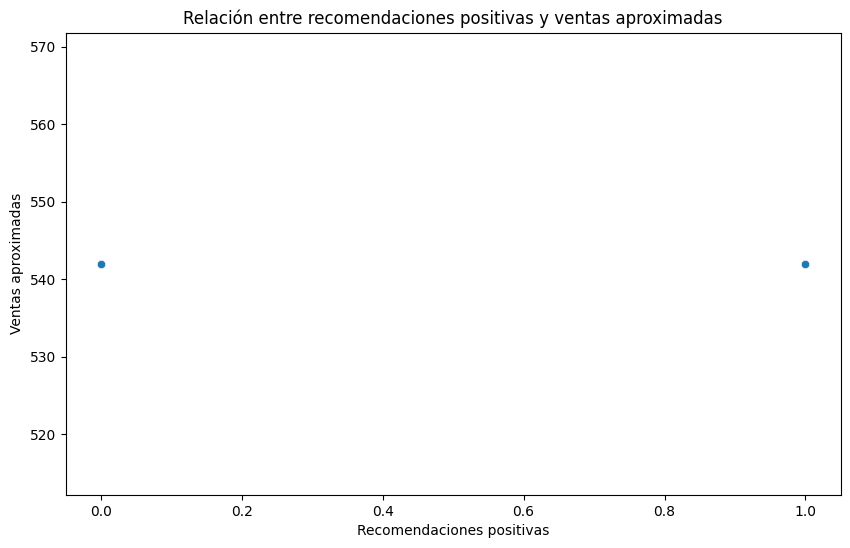

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reviews.doRecommend', y='ventas_aproximadas', data=data)
plt.title('Relación entre recomendaciones positivas y ventas aproximadas')
plt.xlabel('Recomendaciones positivas')
plt.ylabel('Ventas aproximadas')
plt.show()


In [35]:
import zipfile

# Usar la ruta completa del archivo Amazon.zip
zip_path = '/content/Amazon.zip'

# Extraer el nombre del archivo dentro del zip y cargarlo
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    file_names = zip_ref.namelist()  # Lista de archivos dentro del zip
    csv_file_name = file_names[0]    # Asumimos que el primer archivo es el que necesitas

    # Cargar el archivo CSV directamente desde el zip
    with zip_ref.open(csv_file_name) as csv_file:
        data = pd.read_csv(csv_file)

# Verificar los valores nulos como antes
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])  # Mostrar solo las columnas con valores nulos

colors                   823
dimension               1032
ean                      699
manufacturer             632
manufacturerNumber       695
reviews.date             380
reviews.doRecommend     1058
reviews.numHelpful       697
reviews.rating           420
reviews.title             17
reviews.userCity        1597
reviews.userProvince    1597
reviews.username          17
sizes                   1597
upc                      699
weight                   911
dtype: int64


In [37]:

# Mostrar información sobre los valores nulos
missing_values = data.isnull().sum()
missing_values[missing_values > 0]  # Mostrar solo las columnas con valores nulos


,0
colors,823
dimension,1032
ean,699
manufacturer,632
manufacturerNumber,695
reviews.date,380
reviews.doRecommend,1058
reviews.numHelpful,697
reviews.rating,420
reviews.title,17


In [38]:
# Rellenar valores nulos en columnas numéricas con la mediana
data['reviews.rating'].fillna(data['reviews.rating'].median(), inplace=True)
data['reviews.numHelpful'].fillna(data['reviews.numHelpful'].median(), inplace=True)


<ipython-input-38-861315b66b95>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['reviews.rating'].fillna(data['reviews.rating'].median(), inplace=True)
<ipython-input-38-861315b66b95>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [39]:
# Rellenar valores nulos en columnas de texto con "No especificado"
fill_value_text = "No especificado"
columns_to_fill_text = ['colors', 'dimension', 'manufacturer', 'manufacturerNumber']
data[columns_to_fill_text] = data[columns_to_fill_text].fillna(fill_value_text)


In [40]:
# Comprobar si quedan valores nulos
print(data.isnull().sum())


id                         0
asins                      0
brand                      0
categories                 0
colors                     0
dateAdded                  0
dateUpdated                0
dimension                  0
ean                      699
keys                       0
manufacturer               0
manufacturerNumber         0
name                       0
prices                     0
reviews.date             380
reviews.doRecommend     1058
reviews.numHelpful         0
reviews.rating             0
reviews.sourceURLs         0
reviews.text               0
reviews.title             17
reviews.userCity        1597
reviews.userProvince    1597
reviews.username          17
sizes                   1597
upc                      699
weight                   911
dtype: int64



### Conclusiones y Reflexiones Finales
 - Hipótesis 1: Con base en esta visualización, parece que el número de reseñas de un producto no es un buen indicador del número de reseñas útiles. Algunos productos pueden tener muchas reseñas, pero la mayoría de ellas podrían no ser particularmente útiles para los usuarios.
 Para esta hipótesis, no se confirma una relación directa entre el volumen total de reseñas y el número de reseñas útiles. Esto sugiere que los factores que influyen en la utilidad de las reseñas podrían estar más relacionados con el contenido de las reseñas y no con la cantidad total de reseñas.
 Esta conclusión se basa en la visualización de los datos: una diferencia clara entre categorías respaldaría la hipótesis, mientras que una distribución pareja de reseñas útiles entre categorías la refutaría.
 - Hipotesis 2: Con base en los resultados visuales y en el coeficiente de correlación (si se calculó), parece que no hay una relación fuerte entre el puntaje promedio de las reseñas y la cantidad de reseñas útiles. Esto implica que, aunque los productos con puntajes más altos tienden ligeramente a tener más reseñas útiles, la relación no es lo suficientemente fuerte para considerar el puntaje promedio como un buen predictor de la utilidad de las reseñas.
En resumen:
•	La hipótesis no se confirma completamente. La relación entre puntaje promedio y número de reseñas útiles es débil.
•	Sería útil explorar otros factores (como la popularidad del producto o el contenido de la reseña) para entender mejor qué influye en la utilidad de las reseñas.
